In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("./housing.data", delim_whitespace=True, header=None)

In [4]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns=col_name

In [5]:
X = df['RM'].values.reshape(-1,1)
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [6]:
y = df['MEDV'].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
from sklearn.linear_model import LinearRegression


In [8]:
model = LinearRegression()


In [9]:
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
model.coef_


array([9.10210898])

In [11]:
model.intercept_


-34.67062077643857

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


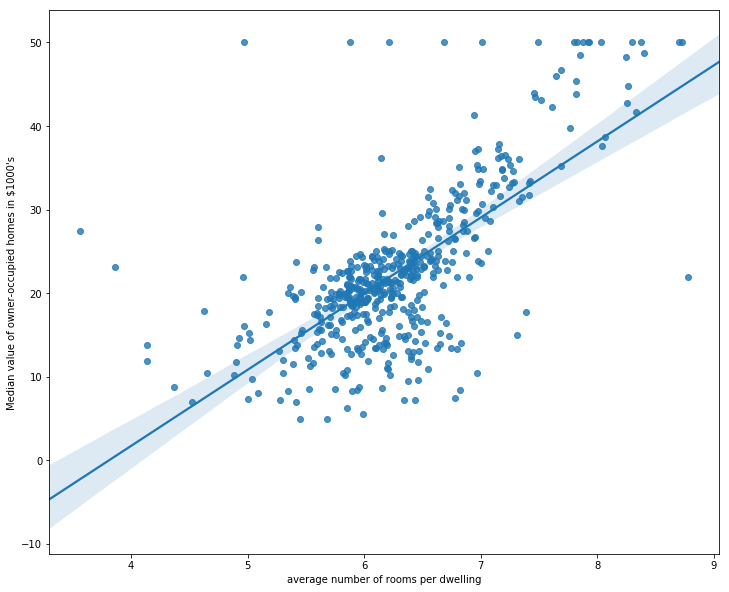

In [12]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


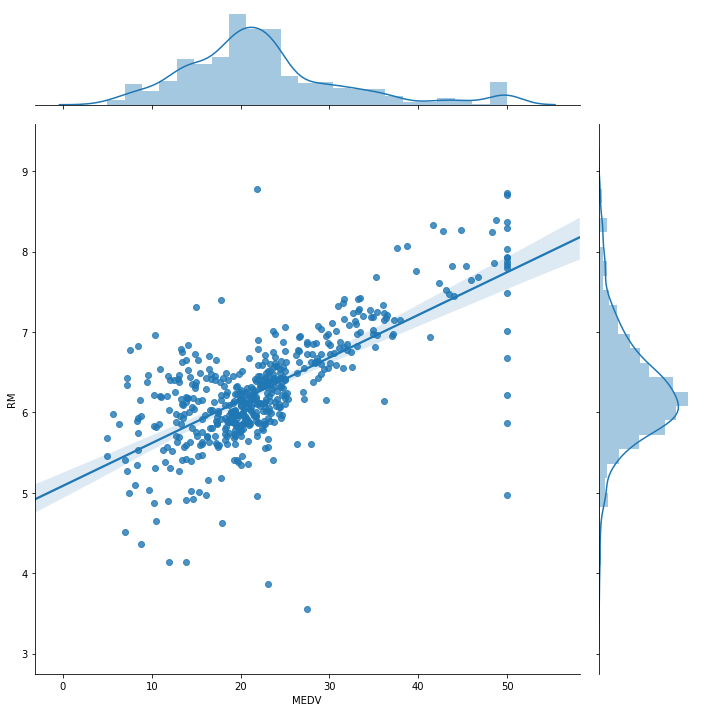

In [13]:
sns.jointplot(x='MEDV', y='RM', data=df, kind='reg', size=10);
plt.show();

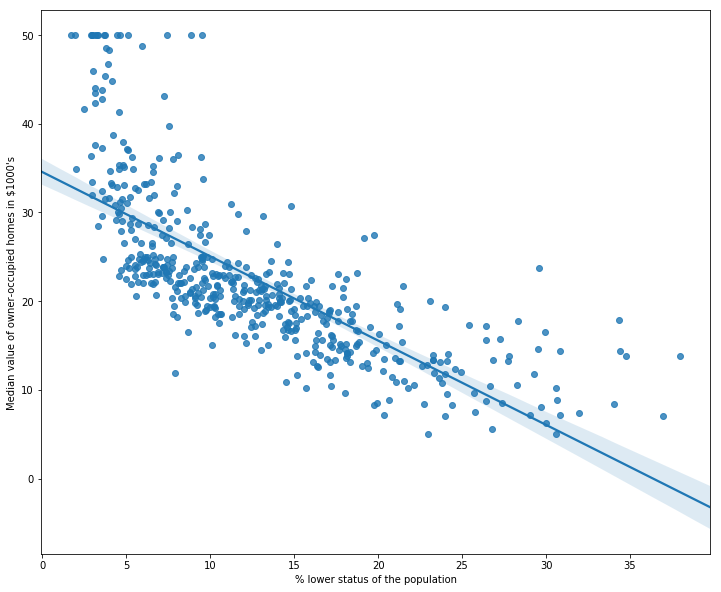

In [14]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
model.fit(X, y)
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

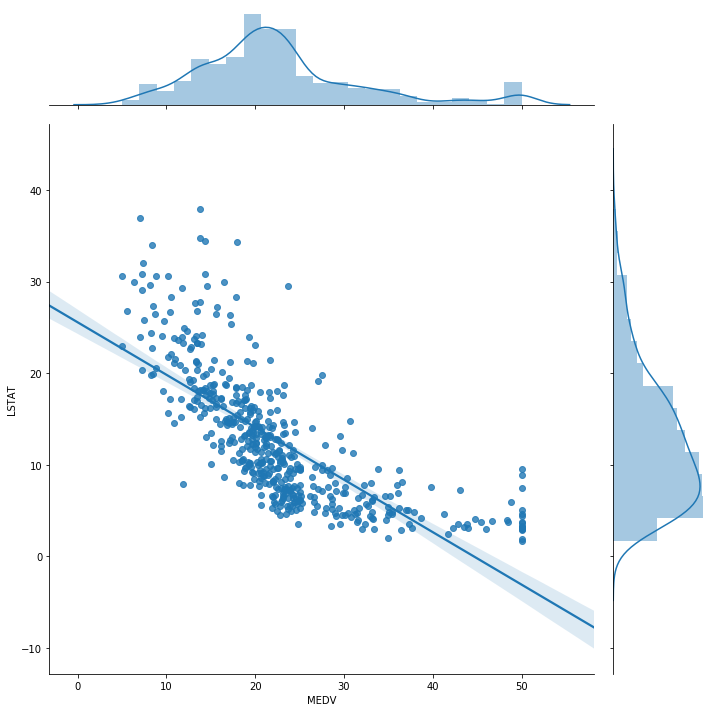

In [15]:
sns.jointplot(x='MEDV', y='LSTAT', data=df, kind='reg', size=10);
plt.show();

# 17. Robust Regression

In [16]:
from sklearn.linear_model import RANSACRegressor

ransac=RANSACRegressor()

X=df['RM'].values.reshape(-1,1)
y=df['MEDV'].values

In [17]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_trials=100, min_samples=None,
        random_state=None, residual_metric=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [18]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

In [19]:
line_X=np.arange(3,10,1)
line_y_ransac=ransac.predict(line_X.reshape(-1,1))

In [20]:
line_y_ransac

array([-14.42347135,  -3.07149351,   8.28048432,  19.63246216,
        30.98444   ,  42.33641784,  53.68839568])

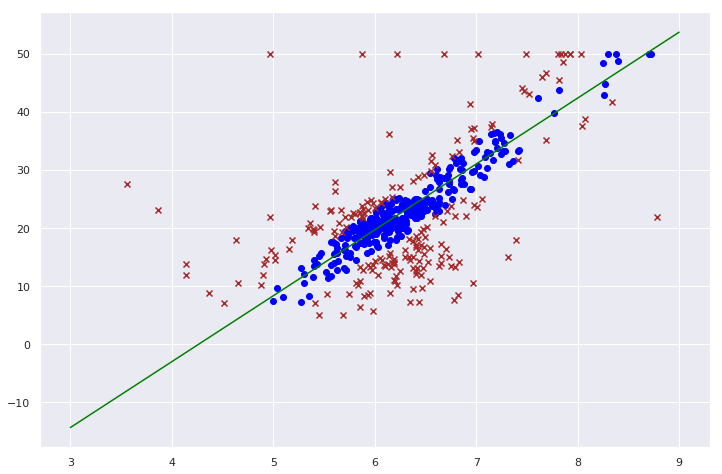

In [21]:
sns.set(style="darkgrid",context="notebook")
plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask],y[inlier_mask],c='blue',marker="o",label="Inliers")
plt.scatter(X[outlier_mask],y[outlier_mask],c='brown',marker="x",label="Inliers")
plt.plot(line_X,line_y_ransac,color="green")
plt.show()

# 18. Evaluate Regression Model Performance

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x=df.iloc[:,:-1].values

In [81]:
y=df['MEDV'].values

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
lr=LinearRegression()

In [84]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
y_train_pred=lr.predict(X_train)

In [86]:
y_test_pred=lr.predict(X_test)

## 18.1 Residual Analysis

In [88]:
# %matplotlib widget
plt.figure(figsize=(12,0))
# plt.scatter(y_train_pred,y_train_pred-y_train,c="blue",marker="o",label="Training_data")
# plt.scatter(y_test_pred,y_test_pred-y_test,c="orange",marker="*",label="Test_data")
plt.xlabel("Predictd values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hline(y=0,xmin=-10,xmax=50,lw=2,color="k")
plt.xlim([-10,50])
plt.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


AttributeError: module 'matplotlib.pyplot' has no attribute 'hline'

## 18.2 Mean Squared Error (MSE)

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
mean_squared_error(y_train,y_train_pred)

42.82047894172751

In [91]:
mean_squared_error(y_test,y_test_pred)

46.90735162739531

## 18.3 Coefficient of Determination, R2

In [92]:
from sklearn.metrics import r2_score

In [93]:
r2_score(y_train,y_train_pred)

0.4970800097843844

In [94]:
r2_score(y_test,y_test_pred)

0.42394386816456286